# The Verlet method applied to the Kepler problem: Lab 2

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

def kepler_analytic(vel,T):

    #-------------------------------------------------------------------------------
    # Calculate the analytic trajectory for the Kepler central force problem.
    # Assumes an initial position r = (1,0), v = (0,vel).
    #-------------------------------------------------------------------------------
    # INPUTS:
    # - vel: the initial speed.
    # - T: sets an upper limit for |theta| for the e > 1 case (plot up to the
    #        integration time).
    #-------------------------------------------------------------------------------

    # Calculate trajectory from analytic solution

    ecc = np.linalg.norm(vel)**2 - 1        # Eccentricity
    a = 1/(1 - ecc)                         # Semi-major axis

    if ecc < 1:

        theta = np.linspace(0, 2*np.pi, 100) # Equally spaced values from 0 to 2*pi
        b = a * np.sqrt(1 - ecc**2)
        xan = -a * ecc + a * np.cos(theta)
        yan =  b * np.sin(theta)

    else:

        b = a * np.sqrt(ecc**2 - 1)
        theta_max = np.arcsinh(np.linalg.norm(vel) * T/b) # Limit for range of theta
        theta = np.linspace( -theta_max, theta_max, 100)
        xan = - a * ecc + a * np.cosh(theta)
        yan =   b * np.sinh(theta)

    return xan, yan


In [49]:
a = 17.834

ecc = 1- 1/a 
vel = (ecc + 1)**0.5
vel

1.3942479441689868

## <span style="color:red">Q1</span>
### Run the code for the initial non-dimensional velocities \($v_1$ = 0.3, 0.9, 1, 1.2, 1.3, 1.5\). For the first case you will need to reduce the time step from the default value (\$\tau$=0.05\, in non-dimensional units) to obtain a reasonably accurate integration. It may be helpful to consider changes in the time step through factors of 5 or 10. What are some valid indicators that your results are accurate?

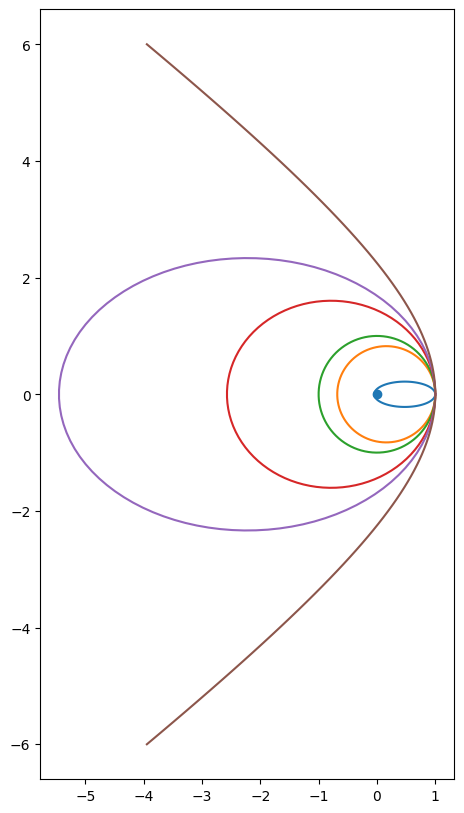

In [46]:
v1 = np.array([0.3, 0.9, 1, 1.2, 1.3, 1.5])

#default T is 4

plt.figure(figsize=(10, 10))

plt.scatter(0, 0)

for v in v1:
    xan, yan = kepler_analytic(v, 4)
    plt.plot(xan, yan)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')


## <span style="color:red">Q2</span>
### Obtain accurate orbits for the cases  \($v_1$=0.3, 0.9, 1, 1.2, 1.3, 1.5\).




Match each case with the most accurate description of its orbit.




Note that the 'near' focus refers to being nearer the initial condition and a 'far' focus refers to one farther from the initial condition.

## <span style="color:red">Q3</span>
### Without changing the numerical integration, modify Verlet method code to store the speed and the distance from the Sun at each time step as a vector, in the same way that the code stores the energy at each time step.


For the initial conditions `r_1=[1,0]`, and `v_1=[0,0.7]`
together with the total integration time `T=10` and time step `tau=0.01`, plot the speed and distance as a function of time.


Notice the distance from the sun at which the speed is a maximum/minimum.


Produce a single plot with your results, save it as an image, and upload it below.

## <span style="color:red">Q4</span>
### Use the min and max functions to compute the ratio of the maximum to the minimum speed, and the ratio of the maximum to the minimum distance, for your results for Part 3 above.


You should find that 
$$\frac{v_{\rm max}}{v_{\rm min}}=\frac{r_{\rm max}}{r_{\rm min}}.$$

If you do not find this, there is an error in your code.

What is the ratio 
$$R=\frac{v_{\rm max}}{v_{\rm min}}=\frac{r_{\rm max}}{r_{\rm min}}?$$


## <span style="color:red">Q5</span>
### The angular momentum of the planet or comet is ${\bf L}={\bf r}\times m{\bf v}$. This quantity is constant during the motion because the force on the planet or comet is radially inwards, which means the torque, $\tau = {\bf r} \times {\bf F} = 0$.
 
The magnitude of the angular momentum is $L=mvr\sin\phi,$ where $\phi$ is the angle between ${\bf v}$ and ${\bf r}$.
 
By considering the angular momentum at perihelion and aphelion (closest and furthest approach from the Sun), prove that
$$v_{\rm max}/v_{\rm min}=r_{\rm max}/r_{\rm min}.$$ 
 
**Write a few line proof.**

# <span style="color:k">Halley's Comet</span>
## <span style="color:red">Q6</span>
### Using the analytic solution to the Kepler problem (see the Appendix to the lecture notes from this week), and assuming non-dimensional initial conditions ${\bf r}_1=(1,0)$, ${\bf v}_1=(0,v_1)$, determine the value of $v_1$ corresponding to an orbit with $a=17.834$.  

Hint: As in the lecture notes, for an elliptical orbit we have eccentricity $e = v_1^2 - 1$ and semi-major axis $a = \frac{1}{1-e}$.

Note: Give your answer for $v_1$ to at least two decimal places below.

Hint: It will be helpful to retain your calculation for $v_1$ to full precision to obtain accurate answers for the subsequent calculations (below).

## <span style="color:red">Q7</span>
### Modify the code Verlet method code to integrate the equations of motion for the initial conditions in 6. Choose a suitable value of $\tau$ for an accurate numerical solution, and a value of the total integration time $T$ which encompasses one period. (*Note*: You will require a large number of integration steps.)
 
Estimate the non-dimensional period $P$ of the motion based on your numerical results. 
 
*Suggestion:* One way to estimate the period is from the plot of total energy versus time. From the Matlab figure, you can identify the period based on the dip in estimated energy associated with closest approach to the Sun (perihelion). 
 
**Write your answer as a number (to at least three significant figures).**

## <span style="color:red">Q8</span>
### Convert the non-dimensional period obtained in Question 7, above, into years. How does your result compare with the experimental estimate of between 75-76 years?

You should use the values of the constants $1~\text{au}=1.5\times 10^{11}$ m, $G = 6.67\times 10^{-11}$ kg$^{-1}$m$^3$s$^{-2}$, $M_{\odot}=1.99\times 10^{30}$ kg.

Give a brief comment.